Mit diesem neuronalen Netz, soll ermittelt werden ob ein Mitarbeiter, anhand von einigen Faktoren, das Unternehmen verlassen wird. Dazu wurde ein Datensatz mit 15000 HR Daten ausgewertet. Folgende Faktoren sind ermittelt worden:
Zufriedenheit (%)
letzte Evaluation (%)
Anzahl der Projekte (Zahl)
durchschnittliche monatliche Arbeitsstunden (Stunden)
Betriebszugehörigkeit (Jahre)
Arbeitsunfall (ja/nein)
Beförderung in den letzten 5 Jahren (ja/nein)
Abteilung (String)	
Gehalt (low/medium/high)

Import der benötigten Frameworks

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#einlesen der Daten in ein Pandas Datenframe
df = pd.read_csv("datasets/HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#Zuweisung von numerischen Werten für die Abteilungen, für ein einfacheres Datenhandling
mymap = {'accounting':1,'hr':2,'IT':3, 'management': 4 ,'marketing':3, 'product_mng' :5 , 
         'RandD':6,'sales':7,'support':8,'technical':9,}

dfh =df.applymap(lambda s: mymap.get(s) if s in mymap else s)

dfh.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [4]:
#Zuweisung von numerischen Werten für das Gehalt, für ein einfacheres Datenhandling#
mymap = {'low':1,'medium':2,'high':3}

dfh1 =dfh.applymap(lambda s: mymap.get(s) if s in mymap else s)

dfh1.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [5]:
#Umsortierung der Spalten um die Daten für Tensorflow aufzubereiten
cols = dfh1.columns.tolist()
cols.insert(9, cols.pop(cols.index('left')))
dfh1 = dfh1.reindex(columns= cols)
dfh1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1


Target value min 0.000 max 1.000 mean 0.238 std 0.426


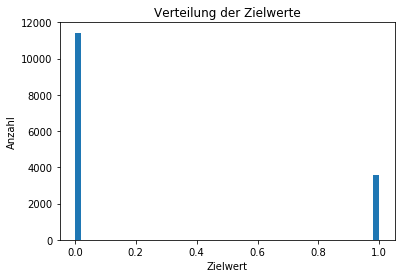

In [6]:
#Übersicht über die Verteilung der Zielwerte
y = dfh1['left'].values
plt.hist(y, bins=50)
plt.xlabel('Zielwert')
plt.ylabel('Anzahl')
plt.title('Verteilung der Zielwerte')
print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))

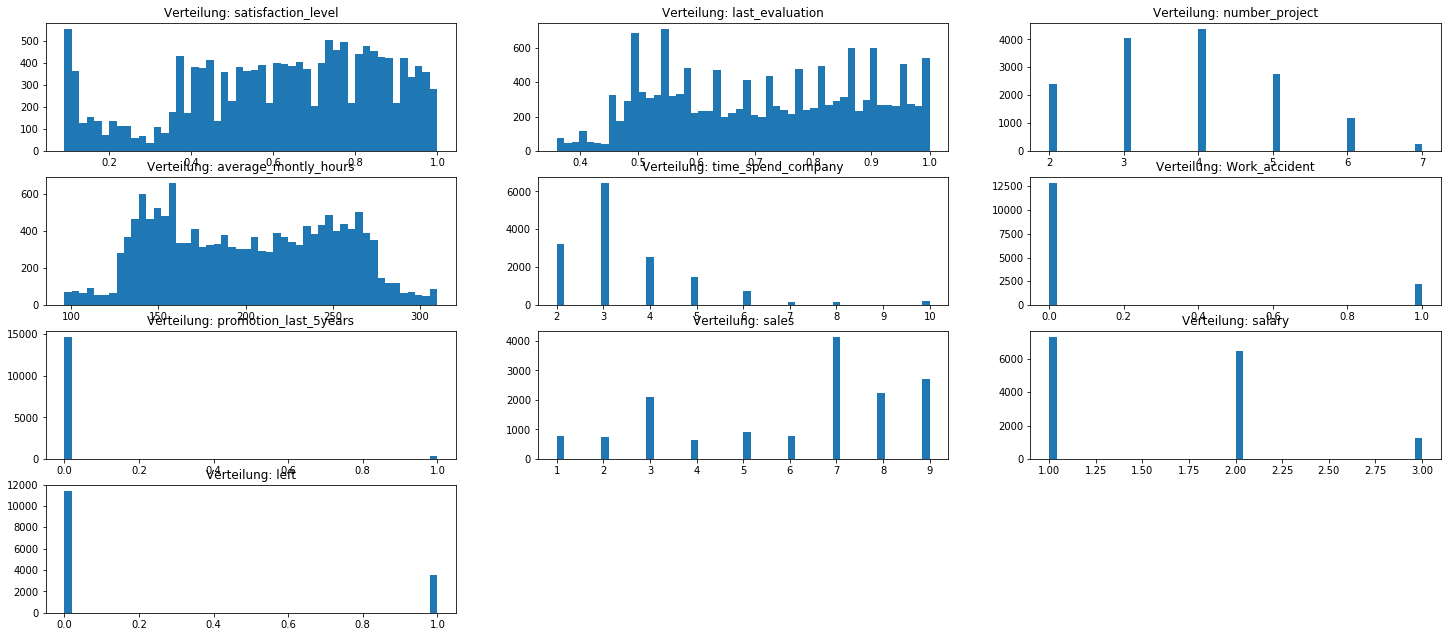

In [7]:
#Übersicht über die Verteilung der einzelnen Atrribute des Datensatzes
F_cols = [col for col in dfh1.columns]
fig = plt.figure(figsize=(25, 25))
plt_count = 0
for col in F_cols:
    plt_count += 1
    plt.subplot(9, 3, plt_count) 
    plt.hist(dfh1[col].values, 50)
    plt.title("Verteilung: "+col)
plt.show()

In [8]:
#Aufteilung in ein Trainings- und ein Testset mit der split Funktion von sklearn
train_set, test_set = train_test_split(dfh1, test_size=0.1, random_state=42)

In [9]:
train_set.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
11809,0.93,0.51,4,110,3,0,0,5,1,0
970,0.38,0.46,2,147,3,0,0,8,1,1
1598,0.83,0.94,5,273,5,0,0,6,2,1
11804,0.64,0.88,3,252,2,0,0,7,1,0
2582,0.58,0.86,5,271,3,0,0,3,1,0


In [10]:
#Abspeichern der Pandas Dataframes in CSV Dateien
train_set.to_csv("train.csv", header=None, index=None)

In [11]:
test_set.to_csv("test.csv", header=None, index=None)

In [12]:
# Laden der CSV Dateien in Tensorflow (hier wurden vorbereitete CSV Dateien genutzt)
training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename='train_prepared.csv',
    target_dtype=np.int,
    features_dtype=np.float32)

testing_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename='test_prepared.csv',
    target_dtype=np.int,
    features_dtype=np.float32)

In [13]:
# Trainingsinputs definieren
def get_train_inputs():
    x = tf.constant(training_set.data)
    y = tf.constant(training_set.target)
    #  y = tf.summary.scalar(, training_set.target)
    return x, y

In [14]:
# Testinputs definieren
def get_test_inputs():
    x = tf.constant(testing_set.data)
    y = tf.constant(testing_set.target)
    return x, y

In [15]:
# Auslesen der Trainingsdaten
training_set.data

array([[ 0.93000001,  0.50999999,  4.        , ...,  0.        ,
         5.        ,  1.        ],
       [ 0.38      ,  0.46000001,  2.        , ...,  0.        ,
         8.        ,  1.        ],
       [ 0.82999998,  0.94      ,  5.        , ...,  0.        ,
         6.        ,  2.        ],
       ..., 
       [ 0.66000003,  0.73000002,  5.        , ...,  0.        ,
         8.        ,  2.        ],
       [ 0.79000002,  1.        ,  4.        , ...,  0.        ,
         7.        ,  1.        ],
       [ 0.98000002,  0.86000001,  2.        , ...,  0.        ,
         7.        ,  1.        ]], dtype=float32)

In [16]:
training_set.target

array([0, 1, 1, ..., 0, 1, 0])

In [17]:
# Aufbau eines Color Dictionarys um den Scatter Plot visualisieren zu können
colorDict = ["blue", "red"]
colorDict

['blue', 'red']

In [18]:
# Zuweisung der Farben zu den Target Werten
# Blau = Mitarbeiter bleibt
# Rot =Mitarbeiter verlässt das Unternehmen
colors = []
for target in training_set.target:
    colors.append(colorDict[target])

In [19]:
#Daten für die Visualisierung definieren
dataX0 = training_set.data[:,0]
dataX1 = training_set.data[:,1]
dataX2 = training_set.data[:,2]
dataX3 = training_set.data[:,3]
dataX4 = training_set.data[:,4]
dataX5 = training_set.data[:,5]
dataX6 = training_set.data[:,6]
dataX7 = training_set.data[:,7]
dataX8 = training_set.data[:,8]

dataY = training_set.target[:]

# Scatterplots
beispielhaft wurden hier 2 Scatterplots gezeichnet um Abhängigkeiten zwischen den Attributen erkennen zu können.
Im ersten Scatterplot wurden die monatlichen Stunden mit der Zufriedenheit verglichen, hierbei fällt auf, dass sich vor allem zwei Cluster bilden bei Leuten, welche das Unternehmen verlassen.
1. Mitarbeiter, welche sehr wenig arbeiten und dabei unzufrieden sind
2. Mitarbeiter mit einer sehr hohen Zufriedenheit und Arbeitsleistung, diese werden womöglich abgeworben

Der zweite Scatterplot zeigt die Zufriedenheit in Abhängigkeit mit der letzten Mitarbeiterevaluation, hier finden sich drei Cluster
1. Hohe Zufriedenheit, gute Evaluation (Mitarbeiter werden womöglich abgeworben
2. Niedrige Zufriedenheit, gute Evaluation (Mitarbeiter sind unzufrieden und verlassen das Unternehmen)
3. Niedrige Zufriedenheit, schlechte Evaluation (Momöglich unmotivierte Minderleister, welche man garnicht halten möchte)

In dieser Form sind noch viele Scatterplots möglich zu visualisieren. 

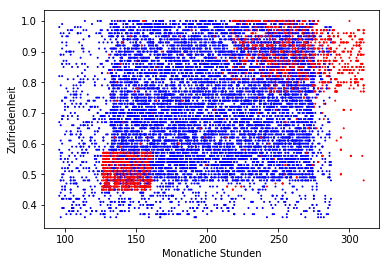

In [20]:
plt.scatter(dataX3, dataX1, c=colors, s=1) # , cmap=plt.cm.cool)
plt.xlabel('Monatliche Stunden')
plt.ylabel('Zufriedenheit')
plt.show()

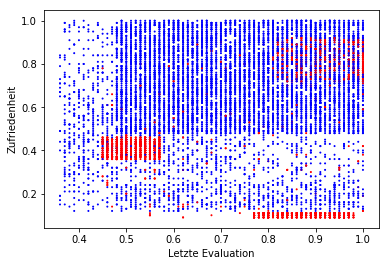

In [21]:
plt.scatter(dataX1, dataX0, c=colors, s=1) # , cmap=plt.cm.cool)
plt.xlabel('Letzte Evaluation')
plt.ylabel('Zufriedenheit')
plt.show()

In [22]:
# Alle Spalten besitzen echte Daten, und die Dimension beträgt 9
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=9)]

In [23]:
# Instanziierung des Classifieres, hier wurden 4 Ebenen gewählt mit jeweils 10, 50, 100, 10 Neuronen, dies ergab in Tests das beste Ergebnis
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 50, 100, 10],
                                            n_classes=2,
                                            model_dir="/tmp/HR_model188")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x117756860>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/HR_model188'}


In [24]:
# Das Trainieren des Classifiers mit Hilfe der Traingsdaten, es wurden 100.000 Schritte gewählt, 
# damit konnte eine Accuracy von 96,XX% erreicht werden
classifier.fit(input_fn=get_train_inputs, steps=100000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/HR_model188/model.ckpt.
INFO:tensorflow:loss = 7.86212, step = 1
INFO:tensorflow:global_step/sec: 30.3593
INFO:tensorflow:loss = 0.56289, step = 101 (3.292 sec)
INFO:tensorflow:global_step/sec: 35.7225
INFO:tensorflow:loss = 0.560729, step = 201 (2.800 sec)
INFO:tensorflow:global_step/sec: 27.4447
INFO:tensorflow:loss = 0.558628, step = 301 (3.644 sec)
INFO:tensorflow:global_step/sec: 35.5696
INFO:tensorflow:loss = 0.556504, step = 401 (2.810 sec)
INFO:tensorflow:global_step/sec: 28.3254
INFO:tensorflow:loss = 0.554369, step = 501 (3.531 sec)
INFO:tensorflow:global_step

INFO:tensorflow:global_step/sec: 33.7864
INFO:tensorflow:loss = 0.304209, step = 7601 (2.959 sec)
INFO:tensorflow:global_step/sec: 34.2459
INFO:tensorflow:loss = 0.296103, step = 7701 (2.921 sec)
INFO:tensorflow:global_step/sec: 33.8944
INFO:tensorflow:loss = 0.278958, step = 7801 (2.950 sec)
INFO:tensorflow:global_step/sec: 33.5979
INFO:tensorflow:loss = 0.271376, step = 7901 (2.977 sec)
INFO:tensorflow:global_step/sec: 33.8236
INFO:tensorflow:loss = 0.269148, step = 8001 (2.955 sec)
INFO:tensorflow:global_step/sec: 34.2933
INFO:tensorflow:loss = 0.264759, step = 8101 (2.917 sec)
INFO:tensorflow:global_step/sec: 34.2641
INFO:tensorflow:loss = 0.26129, step = 8201 (2.918 sec)
INFO:tensorflow:global_step/sec: 33.3442
INFO:tensorflow:loss = 0.257077, step = 8301 (2.999 sec)
INFO:tensorflow:global_step/sec: 33.9678
INFO:tensorflow:loss = 0.254055, step = 8401 (2.945 sec)
INFO:tensorflow:global_step/sec: 33.5675
INFO:tensorflow:loss = 0.253946, step = 8501 (2.978 sec)
INFO:tensorflow:globa

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x117756940>, 'hidden_units': [10, 50, 100, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=9, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x10efa51e0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [25]:
#Ausgabe der Genuigkeit unseres erstellten Classifieres mit Hilfe der Test Daten
accuracy_score = classifier.evaluate(input_fn=get_test_inputs, steps=1)["accuracy"]
print("\nTest Accuracy: {0:.1f}%\n".format(100*accuracy_score))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-08-04-14:09:31
INFO:tensorflow:Restoring parameters from /tmp/HR_model188/model.ckpt-10000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-08-04-14:09:31
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.927333, accuracy/baseline_label_mean = 0.23, accuracy/threshold_0.500000_mean = 0.927333, auc = 0.955923, auc_precision_recall = 0.882341, global_step = 10000, labels/actual_label_mean = 0.23, labels/prediction_mean = 0.20331, loss = 0.211764, precision/positive_threshold_0.500000_mean = 0.837143, recall/positive_threshold_0.500000_mean = 0.849275

Test Accuracy: 92.7%



In [33]:
# Klassifizierung von zwei neuen, selbst ausgedachten Mitarbeitern
def new_samples():
  return np.array(
    [[0.7, 0.47, 2, 154, 3, 0, 0, 7, 1],
     [0.59, 0.55, 6, 250, 5, 0, 0, 6, 2]], dtype=np.float32)

In [34]:
predictions = list(classifier.predict_classes(input_fn=new_samples))
predictions

INFO:tensorflow:Restoring parameters from /tmp/HR_model188/model.ckpt-10000


[0, 1]

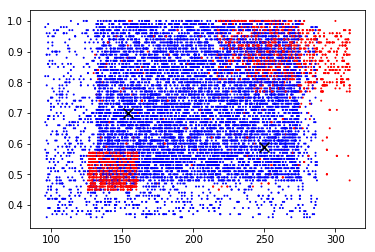

In [35]:
#Einordnung der Mitarbeiter in dem vorher schon gezeigten Scatter Plot
plt.scatter(dataX3, dataX1, c=colors, s=1)
plt.scatter(new_samples()[1,3], new_samples()[1,0], c=["black"], marker="x", s=100)
plt.scatter(new_samples()[0,3], new_samples()[0,0], c=["black"], marker="x", s=100)
plt.show()